# Binance Trading Dataset EDA & Feature Engineering

In [1]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('TRADES_CopyTr_90D_ROI.csv')

In [3]:
df.head()

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."


In [4]:
df.shape

(150, 2)

In [5]:
# type of data inside Trade_History
type(df.loc[0, 'Trade_History'])

str

## Handling Missing Values:

In [6]:
# Check for NaN or None values in Trade_History column
missing_trade_history = df['Trade_History'].isna() | df['Trade_History'].apply(lambda x: x is None)
print("Missing Trade_History entries:\n", df[missing_trade_history])

Missing Trade_History entries:
                 Port_IDs Trade_History
113  3919965573764932864           NaN


In [7]:
# Remove the row with missing Trade_History for respective Port_Id
df = df[df['Port_IDs'] != 3919965573764932864]

## Renaming:

In [8]:
# Rename the column 'Port_IDs' to 'Account_Ids'
df.rename(columns={'Port_IDs': 'Account_Ids'}, inplace=True)

# Replace 'Account_Ids' values with sequential indices starting from 0
df['Account_Ids'] = range(0, len(df))

# Display the modified DataFrame
df

,Account_Ids,Trade_History
0,0,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,1,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,2,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,4,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...
145,144,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,145,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,146,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,147,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


## Flattening the Data:

In [9]:
# Convert Trade_History to a list of dictionaries if it's in string format
df['Trade_History'] = df['Trade_History'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Prepare an empty list to hold the flattened trade data
flattened_data = []

# Loop through each row of the DataFrame
for _, row in df.iterrows():
    account_id = row['Account_Ids']                        # Get the account ID for the current row
    for trade in row['Trade_History']:                     # Loop through each trade in the Trade_History
        
        # Create a new dictionary with Account_Ids first
        flattened_trade = {'Account_Ids': account_id}
        flattened_trade.update(trade)                      # Add the trade details to this dictionary
        flattened_data.append(flattened_trade)             # Add the dictionary to the list

# Update the DataFrame from the flattened data list
df = pd.DataFrame(flattened_data)

# Display the flattened DataFrame
df

,Account_Ids,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,0,1718899656000,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True
1,0,1718899618000,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,0,1718899618000,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,0,1718899616000,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,0,1718899616000,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211272,148,1718549875000,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False
211273,148,1718549875000,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False
211274,148,1718549875000,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False
211275,148,1718549875000,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211277 entries, 0 to 211276
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Account_Ids          211277 non-null  int64  
 1   time                 211277 non-null  int64  
 2   symbol               211277 non-null  object 
 3   side                 211277 non-null  object 
 4   price                211277 non-null  float64
 5   fee                  211277 non-null  float64
 6   feeAsset             211277 non-null  object 
 7   quantity             211277 non-null  float64
 8   quantityAsset        211277 non-null  object 
 9   realizedProfit       211277 non-null  float64
 10  realizedProfitAsset  211277 non-null  object 
 11  baseAsset            211277 non-null  object 
 12  qty                  211277 non-null  float64
 13  positionSide         211277 non-null  object 
 14  activeBuy            211277 non-null  bool   
dtypes: bool(1), float

In [11]:
df.shape

(211277, 15)

In [12]:
df.isnull().sum()

Account_Ids            0
time                   0
symbol                 0
side                   0
price                  0
fee                    0
feeAsset               0
quantity               0
quantityAsset          0
realizedProfit         0
realizedProfitAsset    0
baseAsset              0
qty                    0
positionSide           0
activeBuy              0
dtype: int64

In [13]:
df.columns

Index(['Account_Ids', 'time', 'symbol', 'side', 'price', 'fee', 'feeAsset',
       'quantity', 'quantityAsset', 'realizedProfit', 'realizedProfitAsset',
       'baseAsset', 'qty', 'positionSide', 'activeBuy'],
      dtype='object')

In [14]:
df.head()

,Account_Ids,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,0,1718899656000,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True
1,0,1718899618000,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,0,1718899618000,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,0,1718899616000,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,0,1718899616000,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True


## Temporal Variables:

In [15]:
# Convert 'time' column from epoch time to datetime
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.head()

,Account_Ids,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,0,2024-06-20 16:07:36,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True
1,0,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,0,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,0,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,0,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True


In [16]:
df.dtypes

Account_Ids                     int64
time                   datetime64[ns]
symbol                         object
side                           object
price                         float64
fee                           float64
feeAsset                       object
quantity                      float64
quantityAsset                  object
realizedProfit                float64
realizedProfitAsset            object
baseAsset                      object
qty                           float64
positionSide                   object
activeBuy                        bool
dtype: object

In [17]:
# Extract year, month, day, hour, and minutes
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

In [18]:
df.head()

,Account_Ids,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,month,day,hour,minute
0,0,2024-06-20 16:07:36,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,6,20,16,7
1,0,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,6,20,16,6
2,0,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,6,20,16,6
3,0,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,6,20,16,6
4,0,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True,6,20,16,6


In [19]:
# Drop unnecessary columns
df = df.drop(['time'], axis=1)

In [20]:
df.head(1)

,Account_Ids,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,month,day,hour,minute
0,0,SOLUSDT,BUY,132.537,-0.994027,USDT,1988.055,USDT,0.0,USDT,SOL,15.0,LONG,True,6,20,16,7


In [21]:
# List of temporal variables
time_variables = [feature for feature in df if feature in ['month', 'day', 'hour', 'minute']]
time_variables

['month', 'day', 'hour', 'minute']

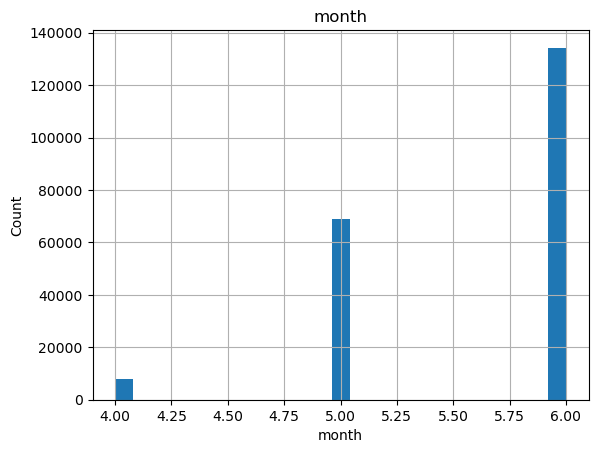

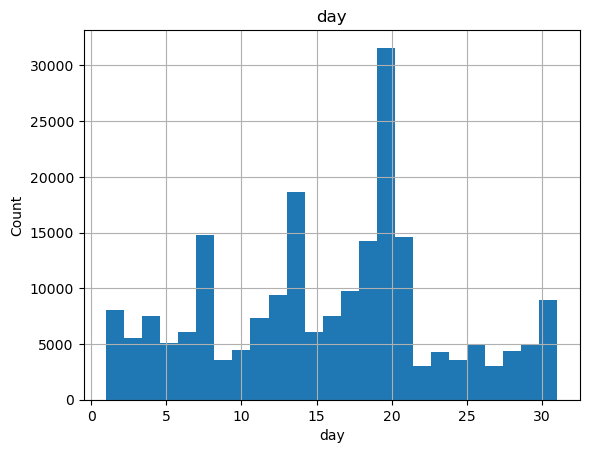

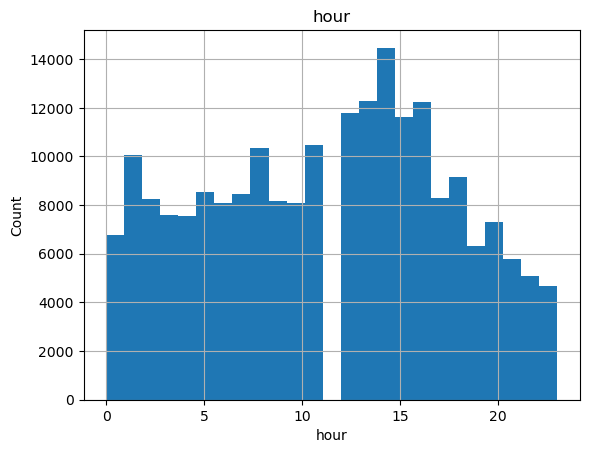

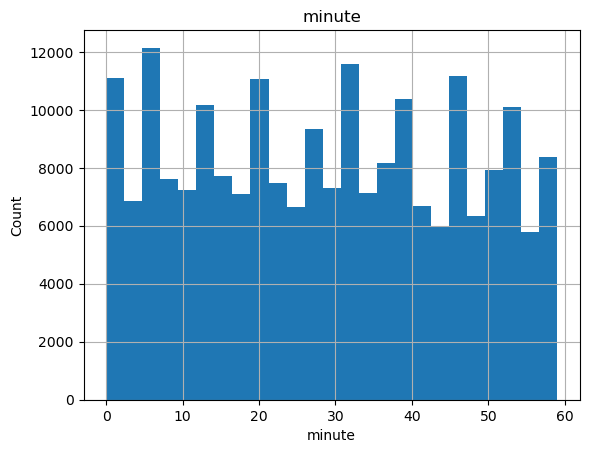

In [22]:
# Create histograms to analyze the distribution of temporal features
for feature in time_variables:
    data = df.copy()
    
    # Plot histogram of the continuous feature with 25 bins
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**Observation:**
1. Most trading happens between the 15th and 20th of each month.
2. The busiest trading time is between 2:30 PM and 3:00 PM.

In [23]:
df.columns

Index(['Account_Ids', 'symbol', 'side', 'price', 'fee', 'feeAsset', 'quantity',
       'quantityAsset', 'realizedProfit', 'realizedProfitAsset', 'baseAsset',
       'qty', 'positionSide', 'activeBuy', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [24]:
df.dtypes

Account_Ids              int64
symbol                  object
side                    object
price                  float64
fee                    float64
feeAsset                object
quantity               float64
quantityAsset           object
realizedProfit         float64
realizedProfitAsset     object
baseAsset               object
qty                    float64
positionSide            object
activeBuy                 bool
month                    int32
day                      int32
hour                     int32
minute                   int32
dtype: object

## Continuous Variables:

In [25]:
# List of Continuous Numerical Variables
continuous_features = [feature for feature in df.columns if df[feature].dtypes == 'float64']
continuous_features

['price', 'fee', 'quantity', 'realizedProfit', 'qty']

## Analysing Continuous Variables Distribution:

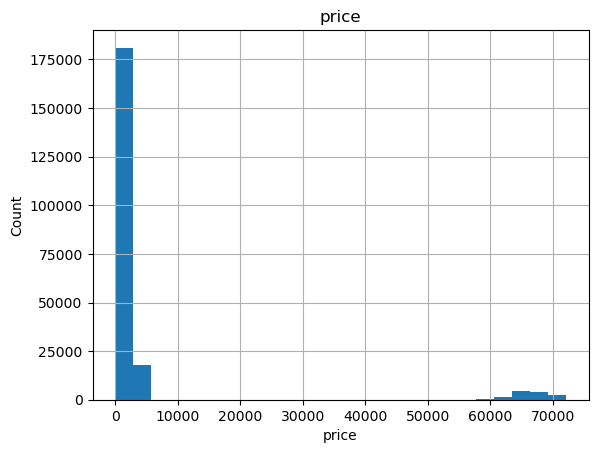

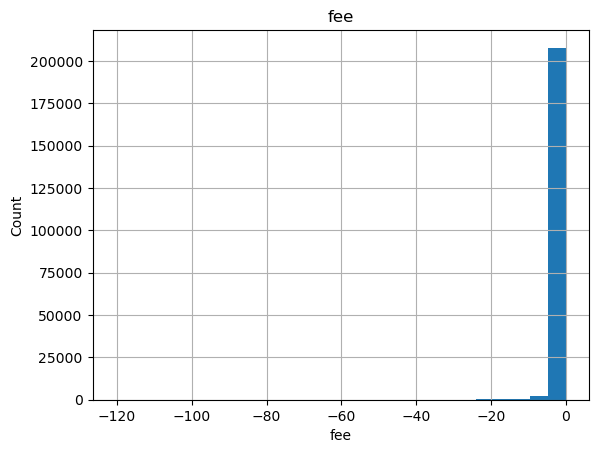

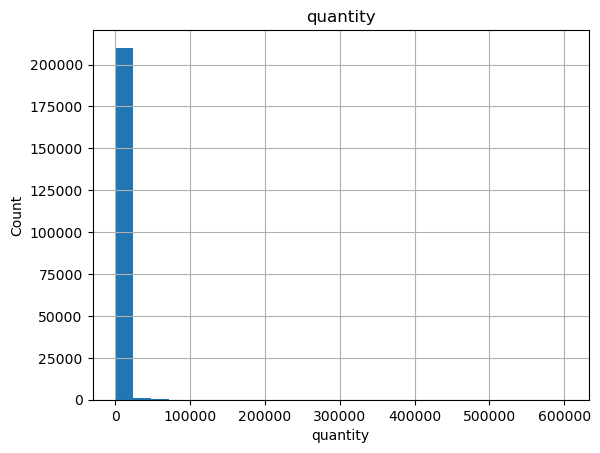

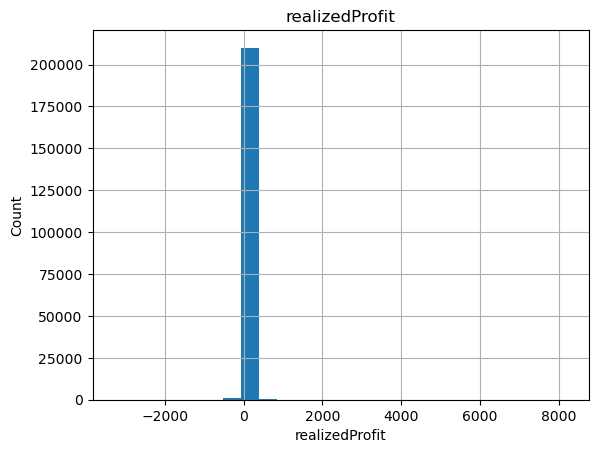

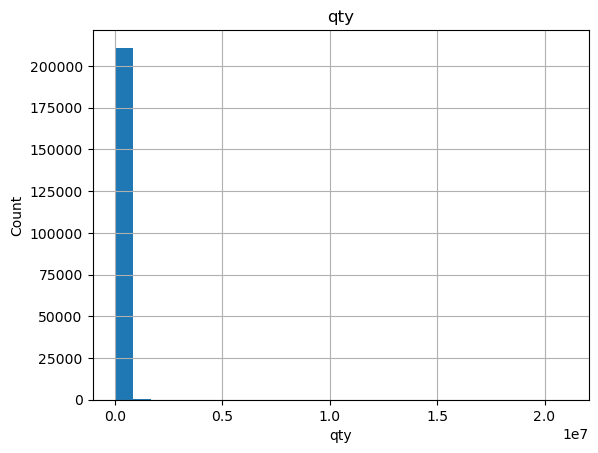

In [26]:
# Create histograms to analyze the distribution of continuous features
for feature in continuous_features:
    data = df.copy()
    
    # Plot histogram of the continuous feature with 25 bins
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [27]:
# Sort 'price' column in descending order
sorted_price = df.sort_values(by='price', ascending=False)

top_trade_prices = sorted_price[['Account_Ids', 'price']].head(10)
top_trade_prices

,Account_Ids,price
71587,64,72105.0
51788,49,72022.0
177531,123,72019.6
51789,49,72015.4
67488,59,72004.1
103492,82,71994.7
11309,7,71988.0
103434,82,71971.7
103433,82,71971.7
103429,82,71970.2


**Observation:** Most trades are priced under 5000 Rs. However, there are some outliers with trades around 60,000 to 70,000+ Rs.

## Finding Outliers in Continuous Variables:

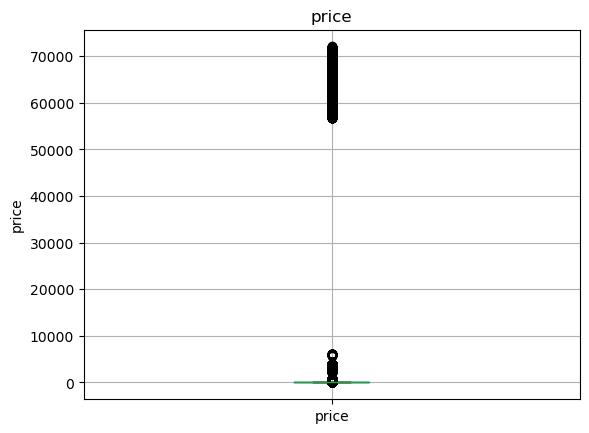

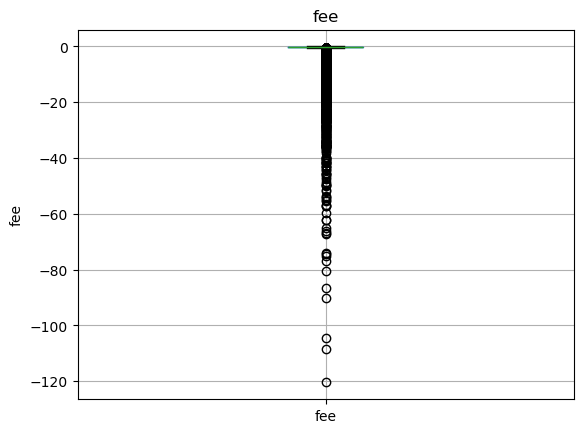

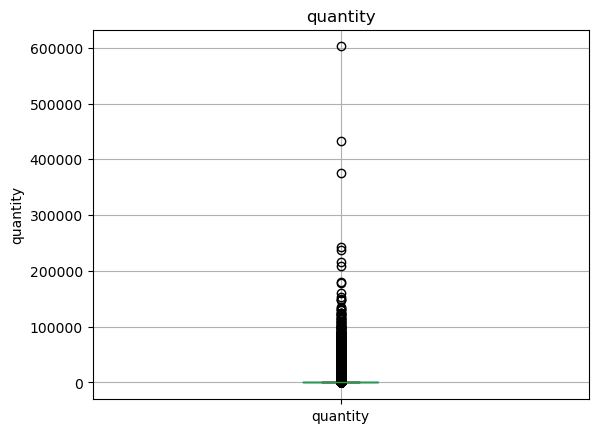

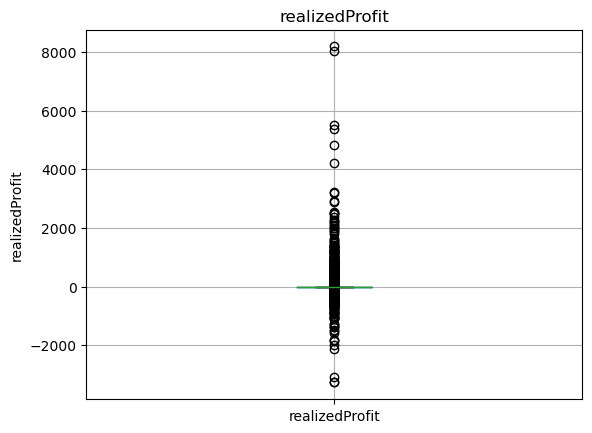

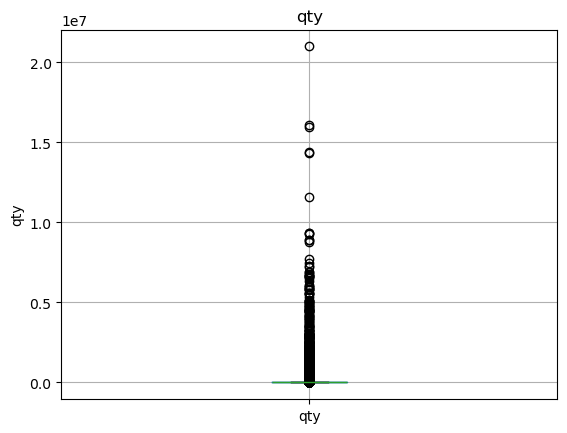

In [28]:
# Create boxplots of Continuous Variables to visualize their distributions
for feature in continuous_features:
    data = df.copy() # Make a copy of the dataset
    
    # Create a boxplot for each continuous feature
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

**Observation:** The 'price' variable has a lot of outliers, while the other continuous variables have very few.

## Categorical Features:

In [29]:
df.head(2)

,Account_Ids,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,month,day,hour,minute
0,0,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,6,20,16,7
1,0,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,6,20,16,6


In [30]:
# All categorical features in the dataset by checking for object data type
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O' or df[feature].dtypes == 'bool']
categorical_features

['symbol',
 'side',
 'feeAsset',
 'quantityAsset',
 'realizedProfitAsset',
 'baseAsset',
 'positionSide',
 'activeBuy']

In [31]:
# Display the first few rows of the dataset for categorical features
df[categorical_features].head()

,symbol,side,feeAsset,quantityAsset,realizedProfitAsset,baseAsset,positionSide,activeBuy
0,SOLUSDT,BUY,USDT,USDT,USDT,SOL,LONG,True
1,DOGEUSDT,BUY,USDT,USDT,USDT,DOGE,LONG,False
2,DOGEUSDT,BUY,USDT,USDT,USDT,DOGE,LONG,False
3,DOGEUSDT,BUY,USDT,USDT,USDT,DOGE,LONG,True
4,DOGEUSDT,BUY,USDT,USDT,USDT,DOGE,LONG,True


## Cardinality of Categorical Variables:

In [32]:
# Print the number of unique categories for each categorical feature
for feature in categorical_features:
    print('The feature is "{}" and number of categories are {}'.format(feature, len(df[feature].unique())))

The feature is "symbol" and number of categories are 154
The feature is "side" and number of categories are 2
The feature is "feeAsset" and number of categories are 1
The feature is "quantityAsset" and number of categories are 1
The feature is "realizedProfitAsset" and number of categories are 1
The feature is "baseAsset" and number of categories are 154
The feature is "positionSide" and number of categories are 3
The feature is "activeBuy" and number of categories are 2


In [33]:
# Drop columns with a single unique value
df = df.drop(columns=['feeAsset', 'quantityAsset', 'realizedProfitAsset'])

In [34]:
df.head(2)

,Account_Ids,symbol,side,price,fee,quantity,realizedProfit,baseAsset,qty,positionSide,activeBuy,month,day,hour,minute
0,0,SOLUSDT,BUY,132.53700,-0.994027,1988.05500,0.0,SOL,15.0,LONG,True,6,20,16,7
1,0,DOGEUSDT,BUY,0.12182,-0.279796,1398.98088,0.0,DOGE,11484.0,LONG,False,6,20,16,6


In [35]:
# Updated the Categorical Feature
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O' or df[feature].dtypes == 'bool']
categorical_features

['symbol', 'side', 'baseAsset', 'positionSide', 'activeBuy']

## Count Plot for Categorical Variables:

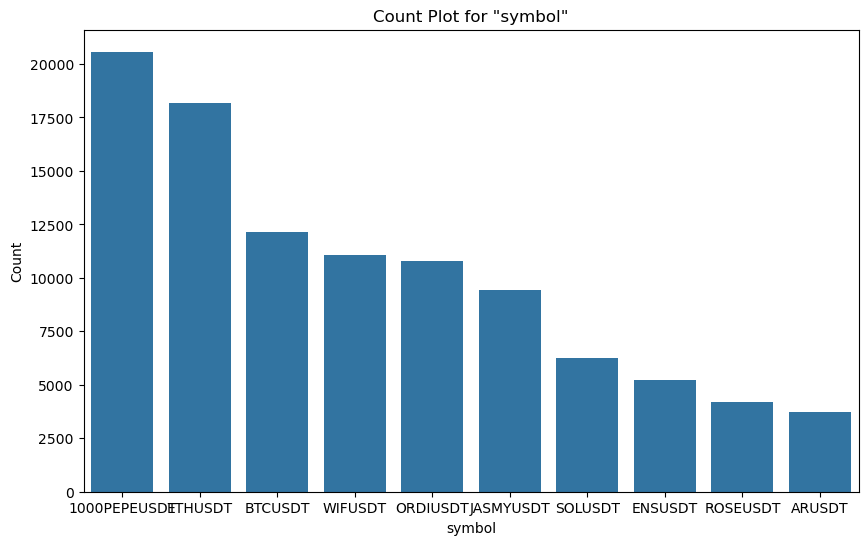

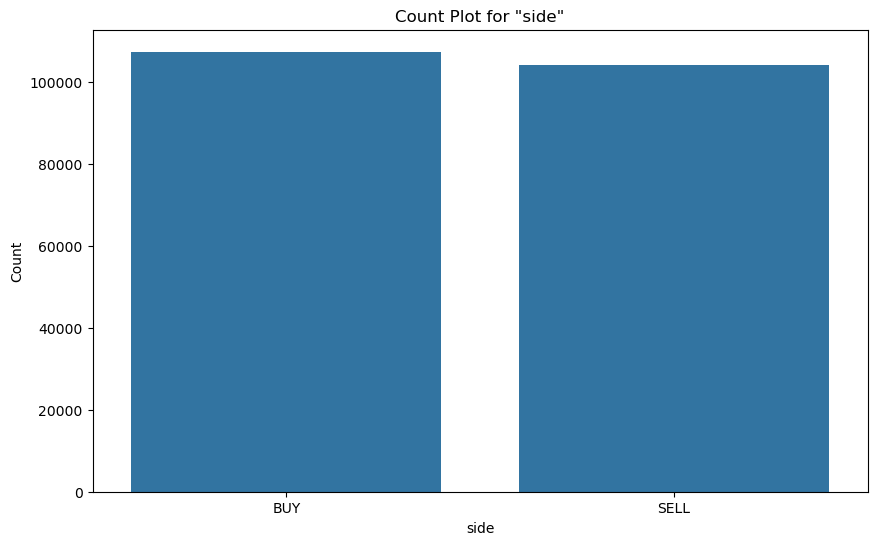

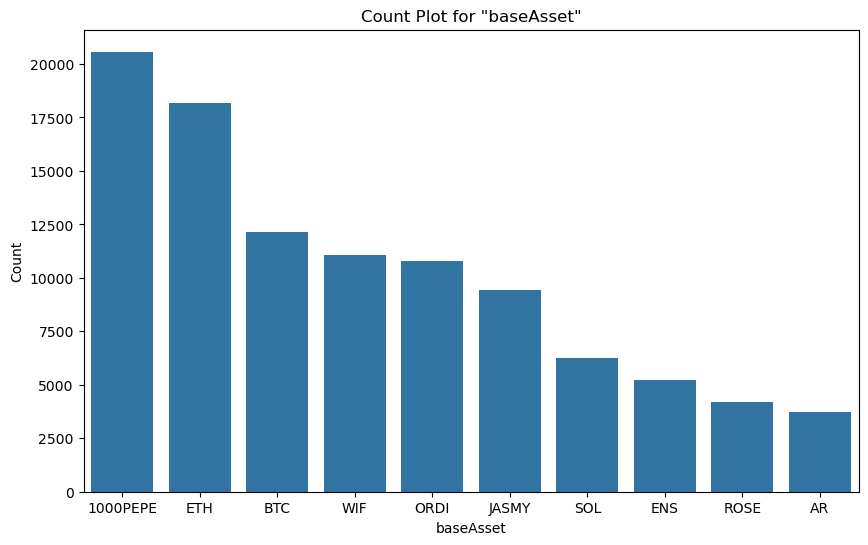

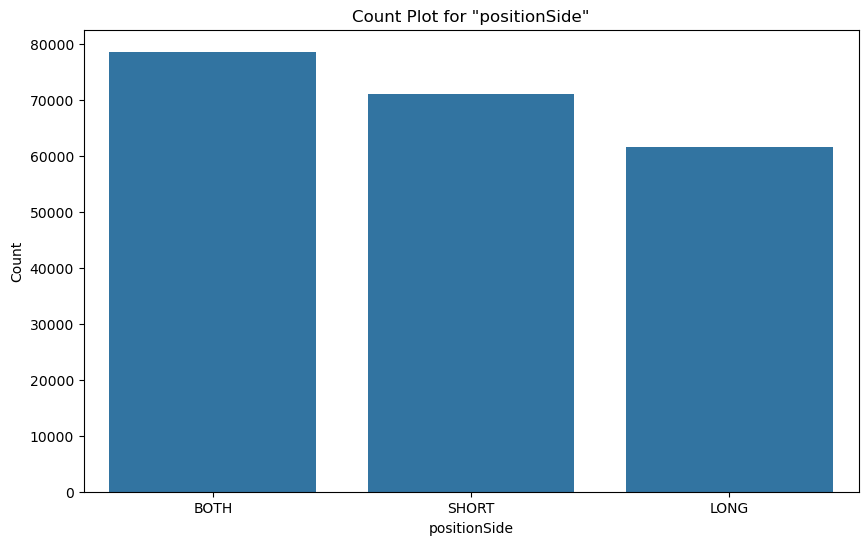

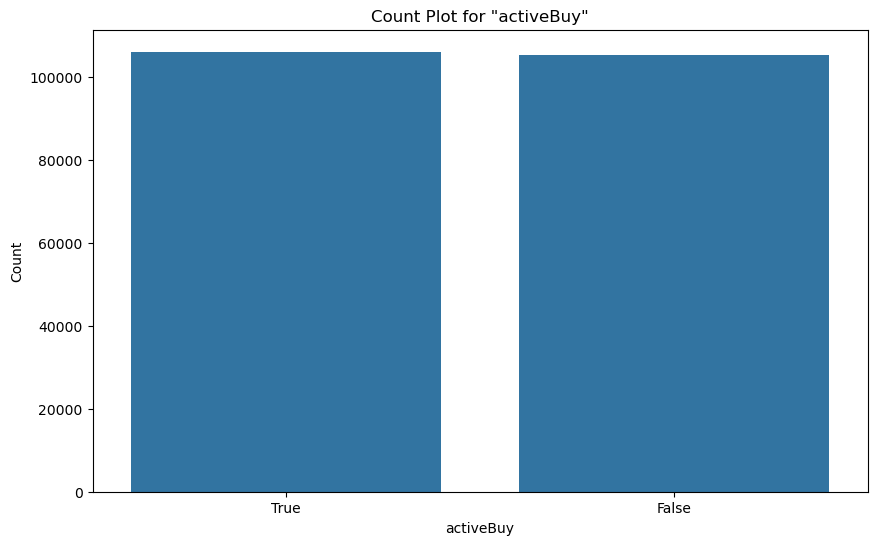

In [36]:
# Create count plots for each categorical feature, showing only the top 10 elements
for feature in categorical_features:
    # Get the top 10 most frequent values for the feature
    top_10 = df[feature].value_counts().nlargest(10).index
    
    # Filter the dataframe to include only the top 10 values
    filtered_df = df[df[feature].isin(top_10)]
    
    # Plot the count plot for the filtered data
    plt.figure(figsize=(10, 6))
    sns.countplot(data=filtered_df, x=feature, order=top_10)
    
    # Labeling
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f'Count Plot for "{feature}"')
    
    # Show the plot
    plt.show()

**Observation:** Most trading occurred in the following base assets:  
- **1000PEPE**: 1000Pepe 
- **ETH**: Ethereum
- **BTC**: Bitcoin
- **WIF**: Dogwifhat Solana
- **ORDI**: Ordinals Bitcoin
- **JASMY**: JasmyCoin
- **SOL**: Solana

## Calculating financial metrics of each account:

### 1. **Return on Investment (ROI)**
ROI measures the gain or loss generated on an investment relative to the amount of money invested.

**ROI = Total Realized Profit / Total Investment**

**Calculation Steps:**
1. Calculate total investment: Sum of the product of `price` and `quantity` for each trade.
2. Calculate total realized profit: Sum of `realizedProfit`.

In [37]:
# Calculate ROI for each account
df['investment'] = df['price'] * df['quantity']  # Investment per trade

roi_per_account = df.groupby('Account_Ids').apply(lambda x: x['realizedProfit'].sum() / x['investment'].sum())
roi_per_account = roi_per_account.rename('ROI').reset_index()

In [38]:
roi_per_account.nlargest(20, 'ROI')

,Account_Ids,ROI
46,46,0.365305
104,104,0.232125
44,44,0.228249
45,45,0.219679
96,96,0.198859
41,41,0.187879
18,18,0.150426
110,110,0.107650
21,21,0.067980
109,109,0.018382


### 2. **Profit and Loss (PnL)**
PnL is simply the total realized profit for each account.

In [39]:
# Calculate total PnL for each account
pnl_per_account = df.groupby('Account_Ids')['realizedProfit'].sum()
pnl_per_account = pnl_per_account.rename('Total_PnL').reset_index()

In [40]:
pnl_per_account.nlargest(20, 'Total_PnL')

,Account_Ids,Total_PnL
82,82,71998.855953
126,126,42574.473679
23,23,26427.331592
64,64,19567.471286
118,118,18015.997370
146,146,17601.401398
22,22,16790.012238
35,35,16337.461881
87,87,14197.577076
43,43,13960.966457


### 3. **Sharpe Ratio**
The Sharpe Ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk.

**Sharpe Ratio = (Average Return - Risk-Free Rate) / Standard Deviation of Returns**

For simplicity, let's assume the risk-free rate is 0.

**Calculation Steps:**
1. Calculate the daily return for each trade.
2. Compute the average return and standard deviation of returns.

In [41]:
# Calculate daily returns
df['daily_return'] = df['realizedProfit'] / df['investment']

# Assume risk-free rate is 0
risk_free_rate = 0.0

# Calculate Sharpe Ratio for each account
sharpe_ratio_per_account = df.groupby('Account_Ids').apply(lambda x: (x['daily_return'].mean() - risk_free_rate) / x['daily_return'].std())
sharpe_ratio_per_account = sharpe_ratio_per_account.rename('Sharpe_Ratio').reset_index()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13236\1876456563.py:8: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio_per_account = df.groupby('Account_Ids').apply(lambda x: (x['daily_return'].mean() - risk_free_rate) / x['daily_return'].std())


In [42]:
sharpe_ratio_per_account.nlargest(20, 'Sharpe_Ratio')

,Account_Ids,Sharpe_Ratio
114,114,1.332030
128,128,1.055677
92,92,0.933112
40,40,0.856423
148,148,0.834513
109,109,0.823177
53,53,0.786586
38,38,0.735282
22,22,0.702144
41,41,0.681550


### 4. **Maximum Drawdown (MDD)**
MDD is the maximum observed loss from a peak to a trough before a new peak is attained.

**Calculation Steps:**
1. Calculate the cumulative returns for each account.
2. Determine the peak value and then find the maximum drop from the peak.

In [43]:
# Calculate cumulative returns
df['cumulative_return'] = df.groupby('Account_Ids')['realizedProfit'].cumsum()

# Function to calculate MDD for each account
def calculate_mdd(returns):
    peak = returns.expanding(min_periods=1).max()
    drawdown = (returns - peak) / peak
    return drawdown.min()

mdd_per_account = df.groupby('Account_Ids').apply(lambda x: calculate_mdd(x['cumulative_return']))
mdd_per_account = mdd_per_account.rename('MDD').reset_index()

### 5. **Win Rate**
Win rate is the percentage of profitable trades.

**Win Rate = Number of Winning Trades / Total Number of Trades**

In [44]:
# Calculate win rate for each account
win_rate_per_account = df.groupby('Account_Ids').apply(lambda x: (x['realizedProfit'] > 0).sum() / len(x))
win_rate_per_account = win_rate_per_account.rename('Win_Rate').reset_index()

In [45]:
win_rate_per_account.nlargest(20, 'Win_Rate')

,Account_Ids,Win_Rate
114,114,0.802612
35,35,0.782217
119,119,0.745396
128,128,0.714286
101,101,0.659218
21,21,0.647597
118,118,0.613971
130,130,0.583333
39,39,0.567460
144,144,0.560543


### 6. **Win Positions**
Win positions are simply the count of trades where there was a profit.

In [46]:
# Calculate win positions for each account
win_positions_per_account = df.groupby('Account_Ids').apply(lambda x: (x['realizedProfit'] > 0).sum())
win_positions_per_account = win_positions_per_account.rename('Win_Positions').reset_index()

In [47]:
win_positions_per_account.nlargest(20, 'Win_Positions')

,Account_Ids,Win_Positions
70,70,2893
35,35,2780
94,94,2774
76,76,2714
85,85,2634
118,118,2540
84,84,2430
126,126,2366
17,17,2326
72,72,2290


### 7. **Total Positions**
Total positions are the count of all trades made by each account.

In [48]:
# Calculate total positions for each account
total_positions_per_account = df.groupby('Account_Ids').size().reset_index(name='Total_Positions')

In [49]:
total_positions_per_account.nlargest(20, 'Total_Positions')

,Account_Ids,Total_Positions
95,95,6085
94,94,6063
17,17,6056
85,85,6052
47,47,6051
5,5,6050
70,70,6050
72,72,6050
76,76,6050
82,82,6050


## Combinining all metrics to single DataFrame:

In [50]:
# Merge all metrics into a single DataFrame
account_metrics = roi_per_account \
    .merge(pnl_per_account, on='Account_Ids') \
    .merge(sharpe_ratio_per_account, on='Account_Ids') \
    .merge(mdd_per_account, on='Account_Ids') \
    .merge(win_rate_per_account, on='Account_Ids') \
    .merge(win_positions_per_account, on='Account_Ids') \
    .merge(total_positions_per_account, on='Account_Ids')

account_metrics

,Account_Ids,ROI,Total_PnL,Sharpe_Ratio,MDD,Win_Rate,Win_Positions,Total_Positions
0,0,2.706500e-07,6789.436739,0.237531,-0.040337,0.333333,486,1458
1,1,2.405421e-05,3686.969761,0.213475,-0.046572,0.185764,107,576
2,2,6.845410e-08,772.729032,0.254581,-0.354619,0.285147,359,1259
3,3,3.166525e-06,3658.765062,-0.067565,-0.156883,0.552833,361,653
4,4,6.741571e-08,1309.459960,0.588250,-0.542381,0.341004,163,478
...,...,...,...,...,...,...,...,...
144,144,7.628887e-07,1803.620133,0.186594,-0.610725,0.560543,537,958
145,145,5.612001e-08,1449.325940,0.307590,0.000000,0.489796,72,147
146,146,6.203965e-08,17601.401398,0.653847,-0.045177,0.542940,373,687
147,147,7.650911e-08,2013.647510,-0.124650,-0.739679,0.209830,111,529


## Standardise the Data:

In [51]:
# The features of account_metrics are not in the same range
account_metrics.std()

Account_Ids          43.156691
ROI                   0.050645
Total_PnL          7764.101217
Sharpe_Ratio          0.277122
MDD                        NaN
Win_Rate              0.148288
Win_Positions       759.213438
Total_Positions    1878.795821
dtype: float64

In [52]:
# There are some infinite values inside MDD, Replace infinite values with NaN
account_metrics.replace([np.inf, -np.inf], np.nan, inplace=True)

In [53]:
# Normalize metrics using StandardScaler()
scaler = StandardScaler()

In [54]:
# Metrics to normalize
metrics = ['ROI', 'Total_PnL', 'Sharpe_Ratio', 'MDD', 'Win_Rate', 'Win_Positions', 'Total_Positions']
normalized_metrics = scaler.fit_transform(account_metrics[metrics])

In [55]:
# metrics has been normalized
normalized_metrics

array([[-0.24312535,  0.2780467 , -0.03281253, ..., -0.26854642,
        -0.10159429,  0.02137996],
       [-0.24265415, -0.12289226, -0.11991493, ..., -1.2670585 ,
        -0.6024788 , -0.44965298],
       [-0.24312935, -0.4995063 ,  0.02892092, ..., -0.59459423,
        -0.26943686, -0.08489618],
       ...,
       [-0.24312948,  1.67530181,  1.4745729 , ...,  1.14973572,
        -0.25093453, -0.39037332],
       [-0.24312919, -0.33913955, -1.34418489, ..., -1.10421876,
        -0.59719242, -0.47475337],
       [-0.23480633, -0.56787796,  2.12872129, ...,  0.37587146,
        -0.73595989, -0.74978961]])

In [56]:
# Create a DataFrame of normalized metrics with their respective Account_Ids
normalized_df = pd.DataFrame(normalized_metrics, columns=metrics)
normalized_df['Account_Ids'] = account_metrics['Account_Ids']

In [57]:
# New Normalized Metrics DataFrame
normalized_df

,ROI,Total_PnL,Sharpe_Ratio,MDD,Win_Rate,Win_Positions,Total_Positions,Account_Ids
0,-0.243125,0.278047,-0.032813,0.208430,-0.268546,-0.101594,0.021380,0
1,-0.242654,-0.122892,-0.119915,0.208059,-1.267059,-0.602479,-0.449653,1
2,-0.243129,-0.499506,0.028921,0.189721,-0.594594,-0.269437,-0.084896,2
3,-0.243068,-0.126537,-1.137493,0.201492,1.216674,-0.266794,-0.408531,3
4,-0.243129,-0.430143,1.237060,0.178544,-0.216642,-0.528469,-0.501990,4
...,...,...,...,...,...,...,...,...
144,-0.243116,-0.366282,-0.217243,0.174475,1.268841,-0.034193,-0.245646,144
145,-0.243130,-0.412068,0.220855,0.210831,0.790140,-0.648735,-0.678761,145
146,-0.243129,1.675302,1.474573,0.208142,1.149736,-0.250935,-0.390373,146
147,-0.243129,-0.339140,-1.344185,0.166798,-1.104219,-0.597192,-0.474753,147


In [58]:
# The features of normalized_df are in the same range
normalized_df.std()

ROI                 1.003373
Total_PnL           1.003373
Sharpe_Ratio        1.003396
MDD                 1.003617
Win_Rate            1.003373
Win_Positions       1.003373
Total_Positions     1.003373
Account_Ids        43.156691
dtype: float64

In [59]:
# Define custom weights for each metric
weights = {
    'ROI': 0.25,
    'Total_PnL': 0.20,
    'Sharpe_Ratio': 0.15,
    'MDD': 0.15,
    'Win_Rate': 0.10,
    'Win_Positions': 0.10,
    'Total_Positions': 0.05
}

In [60]:
# Calculate composite score
def calculate_composite_score(row):
    score = 0
    for metric in metrics:
        # For MDD, lower values are better, so subtract from 1
        if metric == 'MDD':
            score += (1 - row[metric]) * weights[metric]
        else:
            score += row[metric] * weights[metric]
    return score

In [61]:
normalized_df['Composite_Score'] = normalized_df.apply(calculate_composite_score, axis=1)

# Rank accounts based on composite score
ranked_df = normalized_df.sort_values(by='Composite_Score', ascending=False)

# Display the ranked accounts
ranked_df[['Account_Ids', 'Composite_Score']].nlargest(20, 'Composite_Score')

,Account_Ids,Composite_Score
82,82,2.098562
46,46,1.943387
68,68,1.707790
126,126,1.646764
35,35,1.065431
41,41,1.025821
22,22,0.976912
64,64,0.966642
114,114,0.879508
44,44,0.871944


## List of top 20 accounts based on the ranking of calculated financial metrics:

In [62]:
# Display the ranked accounts
ranked_df[['Account_Ids', 'Composite_Score']].nlargest(20, 'Composite_Score')

,Account_Ids,Composite_Score
82,82,2.098562
46,46,1.943387
68,68,1.707790
126,126,1.646764
35,35,1.065431
41,41,1.025821
22,22,0.976912
64,64,0.966642
114,114,0.879508
44,44,0.871944
